#Introduction

## [Machine learning](https://en.wikipedia.org/wiki/Machine_learning)

Programs with **parameters** that **automatically** **adjust** by **adapting** to previously seen **data**.
<br/>
<div class="container-fluid">
  <div class="row">
      <div class="col-md-3"><span/></div>
      <div class="col-md-6">
          <div class='well'>
              <img class='img-thumbnail' src='https://raw.githubusercontent.com/linerocks/vibrastic101/master/img/01/machine-learning.png'/>
          </div>
      </div>
      <div class="col-md-3" align='center'><span/></div>
  </div>
</div>

* Machine learning can be considered a subfield of **artificial intelligence**...
* ...since those algorithms can be seen as building blocks to make computers learn to behave more intelligently.
* **Generalize** instead of that just storing and retrieving data items like a database system would do.

## Machine learning: A modern alchemy

**Intelligent systems** find patterns and discover relations that are latent in large volumes of data.

Features of intelligent systems:

* Learning
* Adaptation
* Flexibility and robustness
* Provide explanations
* Discovery/creativity

### Learning

> Learning is the act of acquiring new, or modifying and reinforcing, existing knowledge, behaviors, skills, values, or preferences and may involve synthesizing different types of information.

* Construction and study of systems that can learn from data.

### Adaptation
* The environment/real world is in constant change.
* The capacity to adapt implies to be able to modify what has been learn in order to cope with those modifications.
* There are many real-world cases:
    * Changes in economy
    * Wear of mechanic parts of a robot
* In many instances the capacity to adapt is essential to solve the problem $\rightarrow$ *continuous learning*.


### Flexibility and robustness
* It is required to have a robust and consistent system.
    * Similar inputs should generate consistent outputs.
* Self-organization
* 'Classical' approaches based on Boolean algebra and logic have limited flexibility.

### Explanations

* Explanations are necessary to validate and find directions for improvement.
* It is not enough to automate the decision making process.
    * In many context explanations are necessary: medicine, credit evaluation, etc.
* They are important if a human expert takes part of the decission loop.
* Machine learning can become a research tool.

### Discovery/creativity

* Capacity of discovering processes and/or relations previously unknown.
* Creation of solution and artifacts.

Example: Evolving cars with genetic algorithms: http://www.boxcar2d.com/.

More formally, the machine learning can be described as:

* Having a **process** $\vec{F}:\mathcal{D}\rightarrow\mathcal{I}$ that **transforms** a given $\vec{x}\in\mathcal{D}$ in a $\vec{y}$. 
* Construct on a dataset $\Psi=\left\{\left<\vec{x}_i,\vec{y}_i\right>\right\}$ with $i=1,\ldots,N$.
* Each $\left<\vec{x}_i,\vec{y}_i\right>$ represents an **input** and its corresponding **expected output**: $\vec{y}_i=\vec{F}\left(\vec{x}_i\right)$.
* **Optimize** a **model** $\mathcal{M}(\vec{x};\vec{\theta})$ by adjusting its parameters $\vec{\theta}$.
    * Make $\mathcal{M}()$ to be as similar as possible to $\vec{F}()$ by optimizing one or more error (loss) functions.

*Note*: Generally, $\mathcal{D}\subseteq\mathbb{R}^n$; the definition of $\mathcal{I}$ depends on the problem.

## Classes of machine learning problems 

* *Classification*: $\vec{F}: \mathcal{D}\rightarrow\left\{1,\ldots, k\right\}$; $\vec{F}(\cdot)$ defines 'categories' or 'classes' labels.
* *Regression*: $\vec{F}: \mathbb{R}^n\rightarrow\mathbb{R}$; it is necessary to predict a real-valued output instead of categories.
* *Density estimation*: predicit a function $p_\mathrm{model}: \mathbb{R}^n\rightarrow\mathbb{R}$, where $p_\mathrm{model}(\vec{x})$ can be interpreted as a [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) on the set that the examples were drawn from.
* *Clustering*: group a set of objects in such a way that objects in the same group (*cluster*) are more *similar* to each other than to those in other groups (clusters).
* *Synthesis*: generate new examples that are similar to those in the training data.

> Many more: [times-series](https://en.wikipedia.org/wiki/Time_series) analysis, [anomaly detection](https://en.wikipedia.org/wiki/Anomaly_detection), [imputation](https://en.wikipedia.org/wiki/Imputation), transcription, etc.

##  Supervised learning

* Sometimes we can observe the pairs $\left<\vec{x}_i,\vec{y}_i\right>$:
    * We can use the $\vec{y}_i$'s to provide a *scalar feedback* on how good is the model $\mathcal{M}(\vec{x};\vec{\theta})$.
    * That feed back is known as the *loss function*.
    * Modify parameters $\vec{\theta}$ as to improve $\mathcal{M}(\vec{x};\vec{\theta})$ $\rightarrow$ *learning*.

An example of a supervised problem (regression)

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# numpy - pretty matrix 
np.set_printoptions(precision=3, threshold=1000, edgeitems=5, linewidth=80, suppress=True)

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('talk')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
# Fixed seed to make the results replicable - remove in real life!
random.seed(42)

In [4]:
x = np.arange(100)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

Let's suppose that we have a phenomenon such that
$$y_\text{real} = \sin\left(\frac{\pi x}{50}\right)\,.$$

In [5]:
y_real = np.sin(x*np.pi/50)
y_real

array([ 0.   ,  0.063,  0.125,  0.187,  0.249,  0.309,  0.368,  0.426,  0.482,
        0.536,  0.588,  0.637,  0.685,  0.729,  0.771,  0.809,  0.844,  0.876,
        0.905,  0.93 ,  0.951,  0.969,  0.982,  0.992,  0.998,  1.   ,  0.998,
        0.992,  0.982,  0.969,  0.951,  0.93 ,  0.905,  0.876,  0.844,  0.809,
        0.771,  0.729,  0.685,  0.637,  0.588,  0.536,  0.482,  0.426,  0.368,
        0.309,  0.249,  0.187,  0.125,  0.063,  0.   , -0.063, -0.125, -0.187,
       -0.249, -0.309, -0.368, -0.426, -0.482, -0.536, -0.588, -0.637, -0.685,
       -0.729, -0.771, -0.809, -0.844, -0.876, -0.905, -0.93 , -0.951, -0.969,
       -0.982, -0.992, -0.998, -1.   , -0.998, -0.992, -0.982, -0.969, -0.951,
       -0.93 , -0.905, -0.876, -0.844, -0.809, -0.771, -0.729, -0.685, -0.637,
       -0.588, -0.536, -0.482, -0.426, -0.368, -0.309, -0.249, -0.187, -0.125,
       -0.063])

Introducing some uniform random noise to simulate measurement noise:

In [6]:
y_measured = y_real + (np.random.rand(100) - 0.5)/1
y_measured

array([ 0.478, -0.419,  0.607,  0.246,  0.562,  0.415,  0.51 ,  0.788,  0.079,
        0.873,  1.03 ,  0.691,  0.514,  0.721,  0.805,  0.521,  0.465,  1.185,
        0.845,  1.418,  1.182,  0.835,  1.346,  0.863,  1.004,  1.014,  1.459,
        0.568,  1.299,  1.191,  0.818,  1.2  ,  1.217,  0.467,  0.389,  0.437,
        0.493,  0.408,  0.407,  0.844,  0.943,  0.42 ,  0.825,  0.461,  0.249,
        0.093,  0.188,  0.295,  0.493,  0.354, -0.149,  0.134, -0.028,  0.257,
       -0.732, -0.619, -0.22 , -0.067, -0.354, -0.907, -0.632, -0.294, -0.242,
       -0.254, -0.435, -0.5  , -1.299, -0.911, -0.634, -0.985, -1.278, -0.649,
       -0.484, -0.67 , -1.189, -1.179, -0.79 , -0.628, -0.779, -0.558, -0.799,
       -0.581, -1.353, -1.172, -1.084, -0.458, -0.274, -0.325, -0.949, -0.182,
       -1.003, -1.026, -0.648, -0.747, -0.092, -0.117, -0.045, -0.53 ,  0.153,
        0.002])

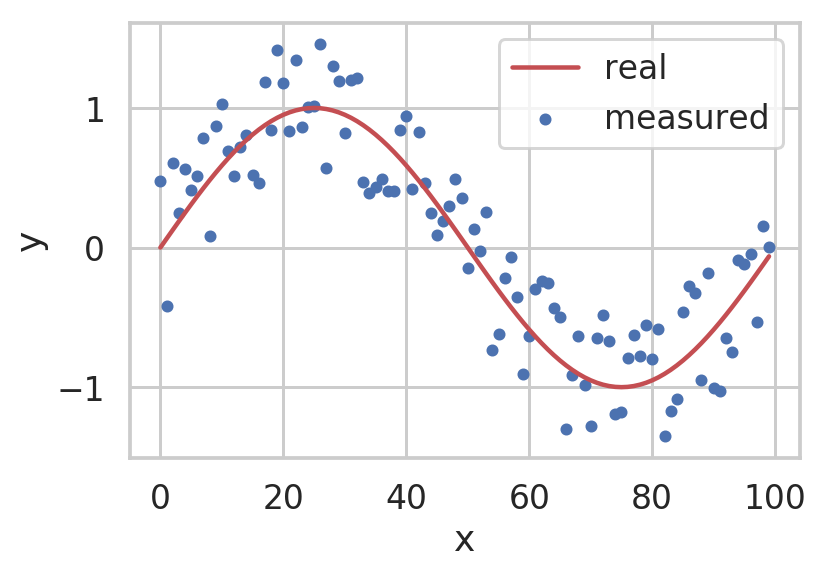

In [7]:
plt.scatter(x,y_measured, marker='.', color='b', label='measured')
plt.plot(x,y_real, color='r', label='real')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(frameon=True);

We can now learn from the dataset $\Psi=\left\{x, y_\text{measured}\right\}$.
* We are going to use a [support vector regressor](https://en.wikipedia.org/wiki/Support_vector_machine) from [`scikit-learn`](http://scikit-learn.org/).
* Don't get too excited, you will have to program things 'by hand'.

Training (adjusting) SVR

In [0]:
from sklearn.svm import SVR

In [9]:
clf = SVR() # using default parameters
clf.fit(x.reshape(-1, 1), y_measured)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

We can now see how our SVR models the data.

In [0]:
y_pred = clf.predict(x.reshape(-1, 1))

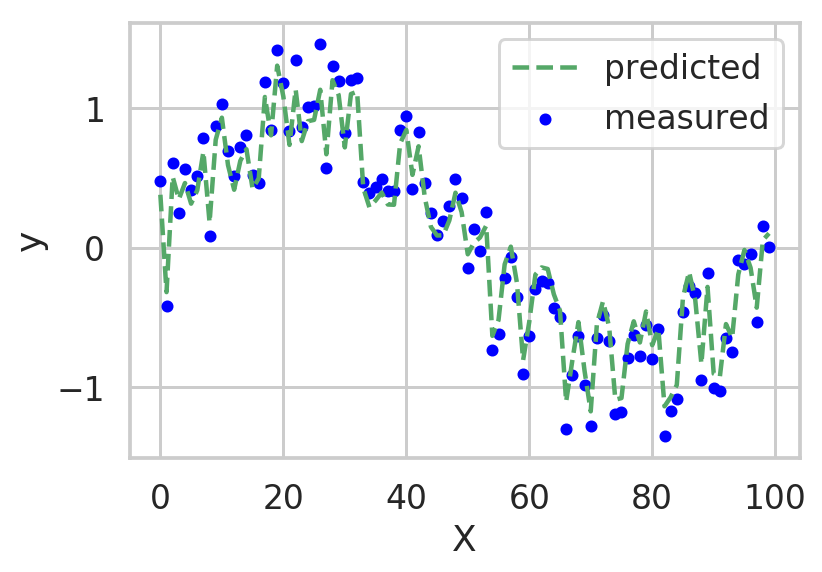

In [11]:
plt.scatter(x, y_measured, marker='.', color='blue', label='measured')
plt.plot(x, y_pred, 'g--', label='predicted')
plt.xlabel('X'); plt.ylabel('y'); plt.legend(frameon=True);

We observe for the first time an important negative phenomenon: *overfitting*.

We will be dedicating part of the course to the methods that we have for control overfitting.

In [12]:
clf = SVR(C=1e3, gamma=0.0001)
clf.fit(x.reshape(-1, 1), y_measured)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_ok = clf.predict(x.reshape(-1, 1))

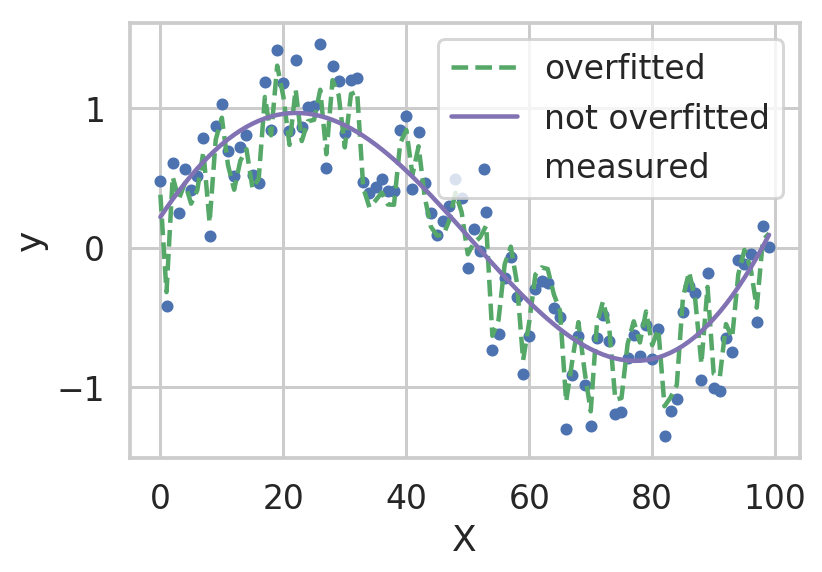

In [14]:
plt.scatter(x, y_measured, marker='.', color='b', label='measured')
plt.plot(x, y_pred, 'g--', label='overfitted')
plt.plot(x, y_pred_ok, 'm-', label='not overfitted')
plt.xlabel('X'); plt.ylabel('y'); plt.legend(frameon=True);

## What if... we don't have a label?

<br/>
<div class="container-fluid">
  <div class="row">
      <div class="col-md-3"><span/></div>
      <div class="col-md-6">
          <div class='well'>
              <img class='img-thumbnail' src='https://raw.githubusercontent.com/linerocks/vibrastic101/master/img/01/balls.jpg'/>
          </div>
      </div>
      <div class="col-md-3" align='center'><span/></div>
  </div>
</div>

## [Unsupervised learning](http://en.wikipedia.org/wiki/Unsupervised_learning)

In some cases we can just observe a series of items or values, e.g., $\Psi=\left\{\vec{x}_i\right\}$:
* It is necessary to find the *hidden structure* of *unlabeled data*.
* We need a measure of correctness of the model that does not requires an expected outcome.
* Although, at first glance, it may look a bit awkward, this type of problem is very common.
    
    * Related to anomaly detection, clustering, etc.
    


### An unsupervised learning example: Clustering

Let's generate a dataset that is composed by three groups or clusters of elements, $\vec{x}\in\mathbb{R}^2$. 

In [0]:
x_1 = np.random.randn(30,2) + (5,5)
x_2 = np.random.randn(30,2) + (10,0)
x_3 = np.random.randn(30,2) + (0,2)

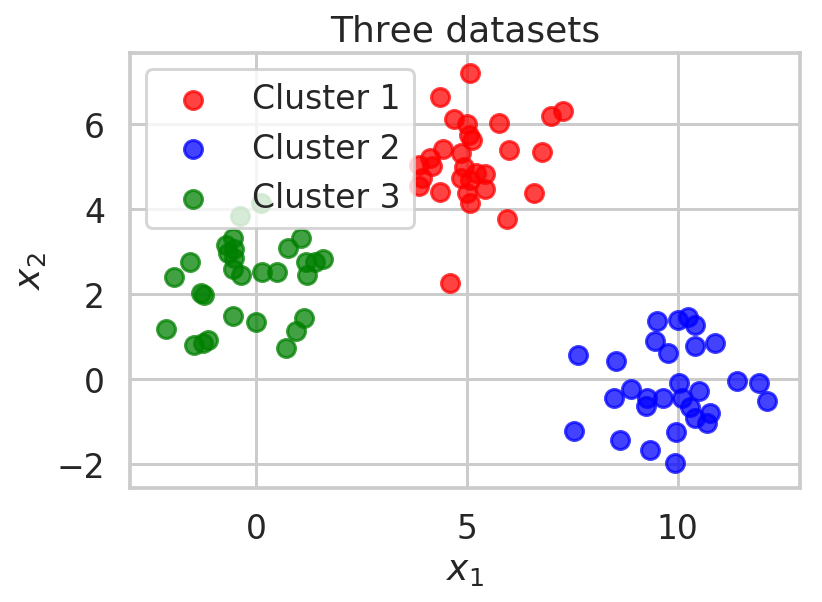

In [16]:
plt.scatter(x_1[:,0], x_1[:,1], c='red', label='Cluster 1', alpha =0.74)
plt.scatter(x_2[:,0], x_2[:,1], c='blue', label='Cluster 2', alpha =0.74)
plt.scatter(x_3[:,0], x_3[:,1], c='green', label='Cluster 3', alpha =0.74)
plt.legend(frameon=True); plt.xlabel('$x_1$'); plt.ylabel('$x_2$'); 
plt.title('Three datasets');

Preparing the training dataset.

In [17]:
x = np.concatenate(( x_1, x_2, x_3), axis=0)
x.shape

(90, 2)

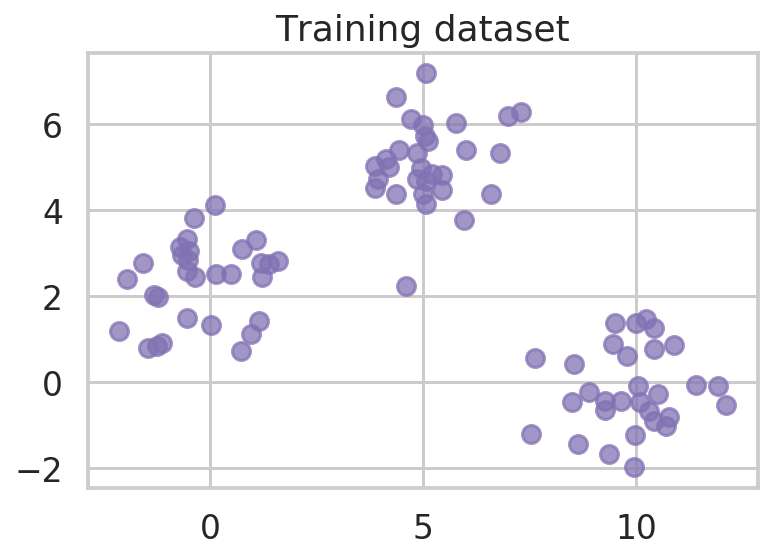

In [18]:
plt.scatter(x[:,0], x[:,1], c='m', alpha =0.74)
plt.title('Training dataset');

We can now try to learn what clusters are in the dataset. We are going to use the [$k$-means clustering algorithm](https://en.wikipedia.org/wiki/K-means_clustering).

In [0]:
from sklearn.cluster import KMeans

In [20]:
clus = KMeans(n_clusters=3)
clus.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
labels_pred = clus.predict(x)
print(labels_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


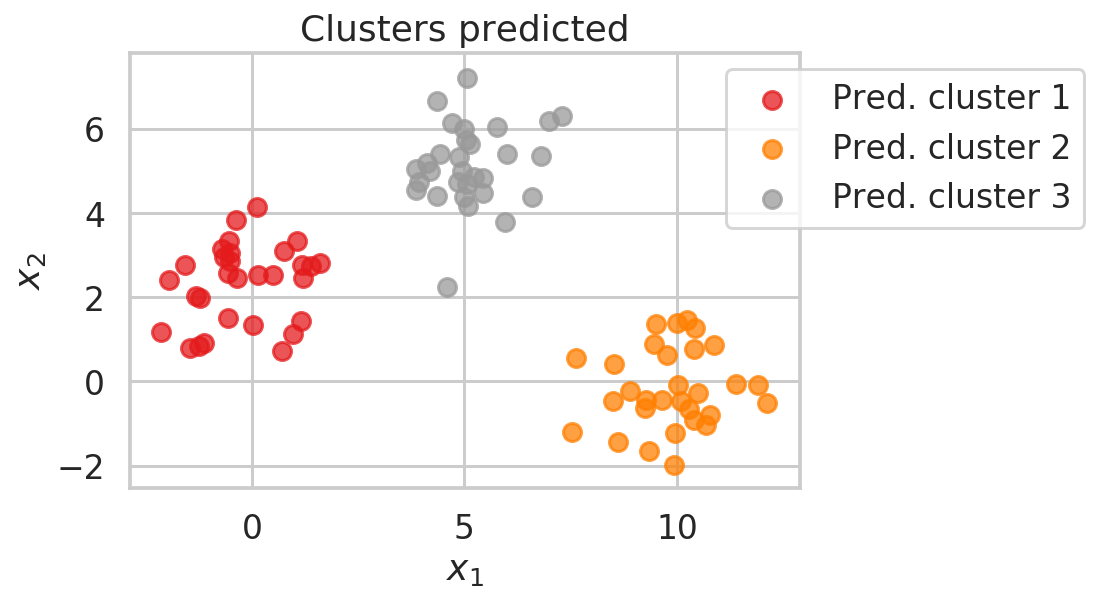

In [22]:
cm=iter(plt.cm.Set1(np.linspace(0,1,len(np.unique(labels_pred)))))
for label in np.unique(labels_pred):
    plt.scatter(x[labels_pred==label][:,0], x[labels_pred==label][:,1],
                c=next(cm), alpha =0.74, label='Pred. cluster ' +str(label+1))
plt.legend(loc='upper right', bbox_to_anchor=(1.45,1), frameon=True);
plt.xlabel('$x_1$'); plt.ylabel('$x_2$'); plt.title('Clusters predicted');

Needing to set the number of clusters can lead to problems.

In [0]:
clus = KMeans(n_clusters=10)
clus.fit(x)
labels_pred = clus.predict(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

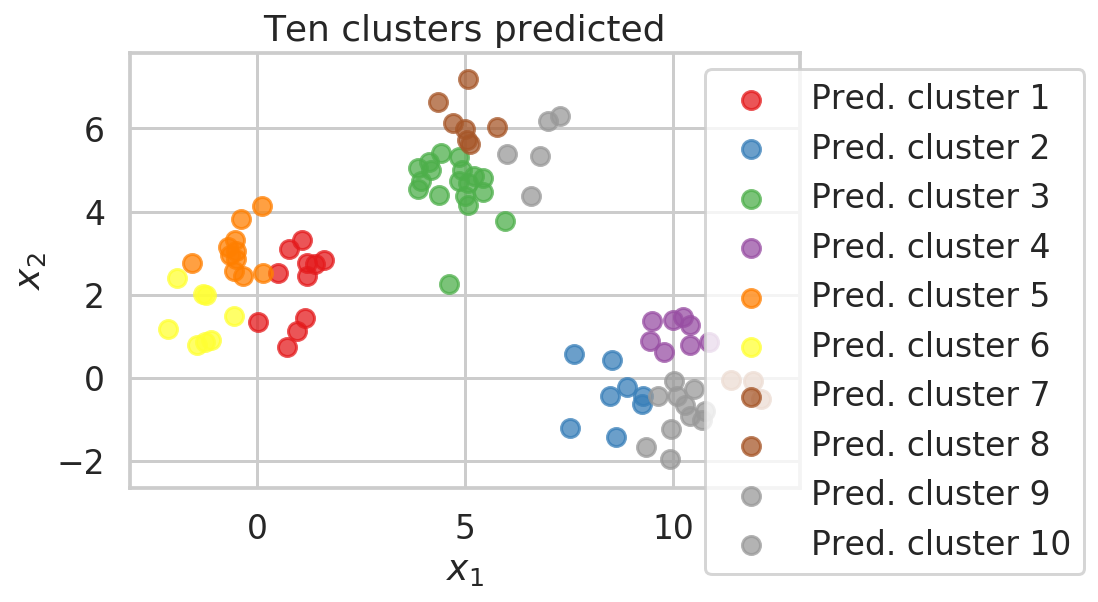

In [24]:
cm=iter(plt.cm.Set1(np.linspace(0,1,len(np.unique(labels_pred)))))
for label in np.unique(labels_pred):
    plt.scatter(x[labels_pred==label][:,0], x[labels_pred==label][:,1],
                c=next(cm), alpha =0.74, label='Pred. cluster ' + str(label+1))
plt.legend(loc='upper right', bbox_to_anchor=(1.45,1), frameon=True)
plt.xlabel('$x_1$'); plt.ylabel('$x_2$'); plt.title('Ten clusters predicted');

## [Semi-supervised learning](http://en.wikipedia.org/wiki/Semi-supervised_learning):
* Obtaining a supervised learning dataset can be expensive.
* Some times it can be complemented with a "cheaper" unsupervised learning dataset.
* What if we first learn as much as possible from unlabeled data and then use the labeled dataset.    

## Reinforcement learning

* Inspired by behaviorist psychology;
* How to take actions in an environment so as to maximize some notion of cumulative reward?
* Differs from standard supervised learning in that correct input/output pairs are never presented, 
* ...nor sub-optimal actions explicitly corrected. 
* Involves finding a balance between exploration (of uncharted territory) and exploitation (of current knowledge). 

## Problems types vs learning

<br/>
<div class="container-fluid">
  <div class="row">
      <div class="col-md-3"><span/></div>
      <div class="col-md-6">
          <div class='well'>
              <img class='img-thumbnail' src='https://raw.githubusercontent.com/linerocks/vibrastic101/master/img/01/ml-problems-unlinked.png'/>
          </div>
      </div>
      <div class="col-md-3" align='center'><span/></div>
  </div>
</div>

## Problems types and learning

<br/>
<div class="container-fluid">
  <div class="row">
      <div class="col-md-3"><span/></div>
      <div class="col-md-6">
          <div class='well'>
              <img class='img-thumbnail' src='https://raw.githubusercontent.com/linerocks/vibrastic101/master/img/01/ml-problems.png'/>
          </div>
      </div>
      <div class="col-md-3" align='center'><span/></div>
  </div>
</div>

## Components of a machine learning problem/solution

- *A parametrized family of functions* $\mathcal{M}(\vec{x};\theta)$ describing how the learner will behave on new examples.
    * What output $\mathcal{M}(\vec{x};\theta)$ will produce given some input $\vec{x}$?
- *A loss function* $\ell()$ describing what scalar loss $\ell(\hat{\vec{y}}, \vec{y})$ is associated with each supervised example $\langle x, y\rangle$, as a function of the learner's output $\hat{\vec{y}} = \mathcal{M}(\vec{x};\theta)$ and the target output $\vec{y}$.
- Training consists in choosing the parameters $\theta$ given some training examples $\Psi=\left\{\left<\vec{x}_i,\vec{y}_i\right>\right\}$ sampled from an unknown data generating distribution $P(X, Y)$.

## Components of a machine learning problem/solution (II)

- Define a *training criterion*. 
    - *Ideally*: to minimize the expected loss sampled from the unknown data generating distribution.
    - This is not possible because the expectation makes use of the true underlying $P()$...
    - ...but we only have access to a finite number of training examples, $\Psi$. 
    - A *training criterion* usually includes an empirical average of the loss over the training set,
    
    $$\min_{\theta}\ \mathbf{E}_{\Psi}[\ell(\mathcal{M}(\vec{x};\vec{\theta}), \vec{y})].$$

## Components of a machine learning problem/solution (III)

- Some additional terms (called *regularizers*) can be added to enforce preferences over the choices of $\vec{\theta}$.

$$\text{min}\ \mathbf{E}_{\Psi}[\ell(f_\theta(\vec{x}), \vec{y})] + R_{1}(\theta)+\cdots+R_{r}(\theta).$$

- *An optimization procedure* to approximately minimize the training criterion by modifying $\theta$.

## Datasets and evaluation

* It is clear now that we need a dataset for training (of fitting or optimizing) the model.
    * **Training dataset**
* We need another dataset to assess progress and compute the training criterion.
    * **Testing dataset**
* As most ML approaches are stochastic and to contrast different approaches we need to have another dataset.
    * **Validation dataset**

This is a cornerstone issue of machine learning and we will be comming back to it.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2"><span/></div>
      <div class="col-md-8">
          <div class='well'>
              <img class='img-thumbnail' src='https://raw.githubusercontent.com/linerocks/vibrastic101/master/img/01/ml.png'/>
          </div>
      </div>
      <div class="col-md-2" align='center'><span/></div>
  </div>
</div>

The machine learning flowchart

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2"><span/></div>
      <div class="col-md-8">
          <div class='well'>
              <img class='img-thumbnail' src='http://scikit-learn.org/stable/_static/ml_map.png'/>
              <small>from Scikit-learn [Choosing the right estimator](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).</small>
          </div>
      </div>
      <div class="col-md-2" align='center'><span/></div>
  </div>
</div>


# *Nature-inspired* machine learning

* Cellular automata
* **Neural computation**
* Evolutionary computation
* Swarm intelligence
* Artificial immune systems
* Membrane computing
* Amorphous computing

# Final remarks
* Different classes of machine learning problems:
    * Classification
    * Regression
    * Clustering.
* Different classes of learning scenarions:
    * Supervised, 
    * unsupervised, 
    * semi-supervised, and 
    * reinforcement learning.
* Model, dataset, loss function, optimization.

# Reading Materials
 
* Read Chapters 1,2 and 3 of Ian Goodfellow, Yoshua Bengio and Aaron Courville (2017) [Deep Learning](http://www.deeplearningbook.org) MIT Press.
* Read Chapter 2 of Hastie, Tibshirani and Friedman (2009) [The Elements of Statistical Learning (2nd edition)](http://statweb.stanford.edu/~tibs/ElemStatLearn/) Springer-Verlag.

<hr/>
<div class="container-fluid">
  <div class='well'>
      <div class="row">
          <div class="col-md-3" align='center'>
              <img align='center'alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"/>
          </div>
          <div class="col-md-9">
              This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).
          </div>
      </div>
  </div>
</div>

---